In [ ]:
# !pip install catboost
# !pip install eli5

# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# conda install catboost
# conda install -c conda-forge eli5
# conda install seaborn
# conda install -c anaconda scikit-learn

In [5]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [6]:
pd.options.display.float_format = '{:.2f}'.format 
plt.rcParams['font.family'] = 'Malgun Gothic'

In [7]:
import os
os.getcwd()

'd:\\workspace\\dacon\\tour_request'

In [8]:
# 데이터 로드
train = pd.read_csv("data/train.csv")
test = pd.read_csv('data/test.csv')
submission = pd.read_csv('data/sample_submission.csv')


In [9]:
train.head()

,id,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,ProdTaken
0,1,28.00,Company Invited,1,10.00,Small Business,Male,3,4.00,Basic,3.00,Married,3.00,0,1,0,1.00,Executive,20384.00,0
1,2,34.00,Self Enquiry,3,NaN,Small Business,Female,2,4.00,Deluxe,4.00,Single,1.00,1,5,1,0.00,Manager,19599.00,1
2,3,45.00,Company Invited,1,NaN,Salaried,Male,2,3.00,Deluxe,4.00,Married,2.00,0,4,1,0.00,Manager,NaN,0
3,4,29.00,Company Invited,1,7.00,Small Business,Male,3,5.00,Basic,4.00,Married,3.00,0,4,0,1.00,Executive,21274.00,1
4,5,42.00,Self Enquiry,3,6.00,Salaried,Male,2,3.00,Deluxe,3.00,Divorced,2.00,0,3,1,0.00,Manager,19907.00,0


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1955 entries, 0 to 1954
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        1955 non-null   int64  
 1   Age                       1861 non-null   float64
 2   TypeofContact             1945 non-null   object 
 3   CityTier                  1955 non-null   int64  
 4   DurationOfPitch           1853 non-null   float64
 5   Occupation                1955 non-null   object 
 6   Gender                    1955 non-null   object 
 7   NumberOfPersonVisiting    1955 non-null   int64  
 8   NumberOfFollowups         1942 non-null   float64
 9   ProductPitched            1955 non-null   object 
 10  PreferredPropertyStar     1945 non-null   float64
 11  MaritalStatus             1955 non-null   object 
 12  NumberOfTrips             1898 non-null   float64
 13  Passport                  1955 non-null   int64  
 14  PitchSat

In [ ]:
train.describe()

In [ ]:
test.describe()

In [11]:
def check_missing_col(dataframe):
    missing_col = []
    counted_missing_col = 0
    for i,col in enumerate(dataframe.columns):
        missing_values = sum(dataframe[col].isna())
        is_missing = True if missing_values >= 1 else False
        if is_missing:
            counted_missing_col +=1
            print('결측치가 있는 칼럼은: %s입니다.'%col)
            print('해당 칼럼에 총 %s개의 결측치가 존재합니다. '%missing_values)
            missing_col.append([col, dataframe[col].dtype])
    if counted_missing_col == 0:
        print('결측치가 존재하지 않습니다.')
    return missing_col

missing_col = check_missing_col(train)

결측치가 있는 칼럼은: Age입니다.
해당 칼럼에 총 94개의 결측치가 존재합니다. 
결측치가 있는 칼럼은: TypeofContact입니다.
해당 칼럼에 총 10개의 결측치가 존재합니다. 
결측치가 있는 칼럼은: DurationOfPitch입니다.
해당 칼럼에 총 102개의 결측치가 존재합니다. 
결측치가 있는 칼럼은: NumberOfFollowups입니다.
해당 칼럼에 총 13개의 결측치가 존재합니다. 
결측치가 있는 칼럼은: PreferredPropertyStar입니다.
해당 칼럼에 총 10개의 결측치가 존재합니다. 
결측치가 있는 칼럼은: NumberOfTrips입니다.
해당 칼럼에 총 57개의 결측치가 존재합니다. 
결측치가 있는 칼럼은: NumberOfChildrenVisiting입니다.
해당 칼럼에 총 27개의 결측치가 존재합니다. 
결측치가 있는 칼럼은: MonthlyIncome입니다.
해당 칼럼에 총 100개의 결측치가 존재합니다. 


In [12]:
missing_col = check_missing_col(test)

결측치가 있는 칼럼은: Age입니다.
해당 칼럼에 총 132개의 결측치가 존재합니다. 
결측치가 있는 칼럼은: TypeofContact입니다.
해당 칼럼에 총 15개의 결측치가 존재합니다. 
결측치가 있는 칼럼은: DurationOfPitch입니다.
해당 칼럼에 총 149개의 결측치가 존재합니다. 
결측치가 있는 칼럼은: NumberOfFollowups입니다.
해당 칼럼에 총 32개의 결측치가 존재합니다. 
결측치가 있는 칼럼은: PreferredPropertyStar입니다.
해당 칼럼에 총 16개의 결측치가 존재합니다. 
결측치가 있는 칼럼은: NumberOfTrips입니다.
해당 칼럼에 총 83개의 결측치가 존재합니다. 
결측치가 있는 칼럼은: NumberOfChildrenVisiting입니다.
해당 칼럼에 총 39개의 결측치가 존재합니다. 
결측치가 있는 칼럼은: MonthlyIncome입니다.
해당 칼럼에 총 133개의 결측치가 존재합니다. 


# 인코딩

In [13]:
train['Gender'].replace({'Fe Male': 'Female'}, inplace=True)
test['Gender'].replace({'Fe Male': 'Female'}, inplace=True)

In [14]:
# 결측치 없는 object칼럼
features = ['Occupation', 'ProductPitched', 'MaritalStatus', 'Designation','Gender']

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
# train을 먼저 인코딩해서 transform을 시키면 이후 test 인코딩 할때 fit을 못하기 때문에 test를 먼저 인코딩 해줌
# train 먼저 인코딩 후 새로운 변수에 할당하는 방법도 있지만 굳이 싶어서 하지 않음

# 결측치 없는 object칼럼들 인코딩
for o_col in features:
    encoder = LabelEncoder()
    encoder.fit(train[o_col])
    test[o_col] = encoder.transform(test[o_col])

In [17]:
# 모든 문자형 변수에 대해 encoder를 적용
for o_col in features:
    encoder = LabelEncoder()
    encoder.fit(train[o_col])
    train[o_col] = encoder.transform(train[o_col])

In [18]:
# 결측치 있는 TypeofContact칼럼 결측치 제외하고 따로 인코딩 
train['TypeofContact'][train['TypeofContact']=='Self Enquiry'] = 1
train['TypeofContact'][train['TypeofContact']=='Company Invited'] = 0

test['TypeofContact'][test['TypeofContact']=='Self Enquiry'] = 1
test['TypeofContact'][test['TypeofContact']=='Company Invited'] = 0

In [19]:
# 결측치 제외하고 숫자형으로 바꿔주기
train['TypeofContact'] = train['TypeofContact'].apply(pd.to_numeric, errors='coerce')
test['TypeofContact'] = test['TypeofContact'].apply(pd.to_numeric, errors='coerce')

In [20]:
missing_col = check_missing_col(train)

결측치가 있는 칼럼은: Age입니다.
해당 칼럼에 총 94개의 결측치가 존재합니다. 
결측치가 있는 칼럼은: TypeofContact입니다.
해당 칼럼에 총 10개의 결측치가 존재합니다. 
결측치가 있는 칼럼은: DurationOfPitch입니다.
해당 칼럼에 총 102개의 결측치가 존재합니다. 
결측치가 있는 칼럼은: NumberOfFollowups입니다.
해당 칼럼에 총 13개의 결측치가 존재합니다. 
결측치가 있는 칼럼은: PreferredPropertyStar입니다.
해당 칼럼에 총 10개의 결측치가 존재합니다. 
결측치가 있는 칼럼은: NumberOfTrips입니다.
해당 칼럼에 총 57개의 결측치가 존재합니다. 
결측치가 있는 칼럼은: NumberOfChildrenVisiting입니다.
해당 칼럼에 총 27개의 결측치가 존재합니다. 
결측치가 있는 칼럼은: MonthlyIncome입니다.
해당 칼럼에 총 100개의 결측치가 존재합니다. 


In [21]:
# 인코딩 확인
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1955 entries, 0 to 1954
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        1955 non-null   int64  
 1   Age                       1861 non-null   float64
 2   TypeofContact             1945 non-null   float64
 3   CityTier                  1955 non-null   int64  
 4   DurationOfPitch           1853 non-null   float64
 5   Occupation                1955 non-null   int32  
 6   Gender                    1955 non-null   int32  
 7   NumberOfPersonVisiting    1955 non-null   int64  
 8   NumberOfFollowups         1942 non-null   float64
 9   ProductPitched            1955 non-null   int32  
 10  PreferredPropertyStar     1945 non-null   float64
 11  MaritalStatus             1955 non-null   int32  
 12  NumberOfTrips             1898 non-null   float64
 13  Passport                  1955 non-null   int64  
 14  PitchSat

# 스케일링

In [22]:
# 로그변환 
train['DurationOfPitch'] = np.log1p(train['DurationOfPitch'])
test['DurationOfPitch'] = np.log1p(test['DurationOfPitch'])

train['MonthlyIncome'] = np.log1p(train['MonthlyIncome'])
test['MonthlyIncome'] = np.log1p(test['MonthlyIncome'])

In [23]:
# 변환된 값 확인
train.describe()

,id,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,ProdTaken
count,1955.00,1861.00,1945.00,1955.00,1853.00,1955.00,1955.00,1955.00,1942.00,1955.00,1945.00,1955.00,1898.00,1955.00,1955.00,1955.00,1928.00,1955.00,1855.00,1955.00
mean,978.00,37.46,0.71,1.64,2.69,2.34,0.62,2.92,3.72,1.17,3.57,1.28,3.26,0.29,3.07,0.62,1.21,1.73,10.05,0.20
std,564.50,9.19,0.45,0.91,0.47,0.63,0.49,0.71,1.00,1.27,0.79,0.93,1.81,0.45,1.37,0.49,0.86,0.95,0.22,0.40
min,1.00,18.00,0.00,1.00,1.79,0.00,0.00,1.00,1.00,0.00,3.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,6.91,0.00
25%,489.50,31.00,0.00,1.00,2.30,2.00,0.00,2.00,3.00,0.00,3.00,1.00,2.00,0.00,2.00,0.00,1.00,1.00,9.92,0.00
50%,978.00,36.00,1.00,1.00,2.71,2.00,1.00,3.00,4.00,1.00,3.00,1.00,3.00,0.00,3.00,1.00,1.00,2.00,10.01,0.00
75%,1466.50,43.00,1.00,3.00,3.04,3.00,1.00,3.00,4.00,2.00,4.00,2.00,4.00,1.00,4.00,1.00,2.00,2.00,10.15,0.00
max,1955.00,61.00,1.00,3.00,3.61,3.00,1.00,5.00,6.00,4.00,5.00,3.00,19.00,1.00,5.00,1.00,3.00,4.00,11.50,1.00


# 이상치 처리

In [24]:
# train과 test를 통합해 이상치 처리 해준 후 다시 분할
total_data = pd.concat([train,test])
total_data = total_data.reset_index()

In [25]:
import seaborn as sns
plt.figure(figsize=(15,8))

<Figure size 1500x800 with 0 Axes>

<Figure size 1500x800 with 0 Axes>

<AxesSubplot:>

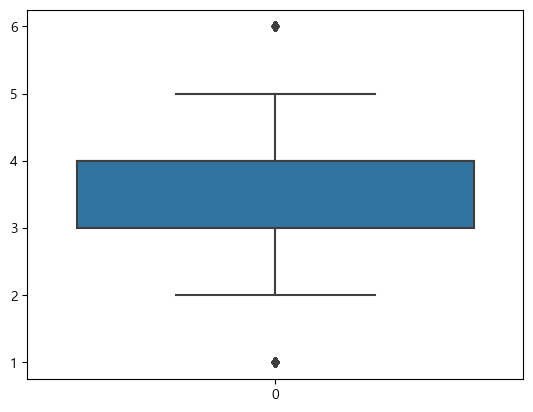

In [26]:
sns.boxplot(data=total_data['NumberOfFollowups'])

<AxesSubplot:>

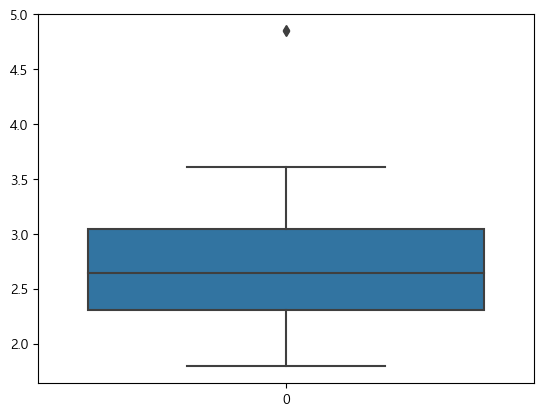

In [27]:
sns.boxplot(data=total_data['DurationOfPitch'])

<AxesSubplot:>

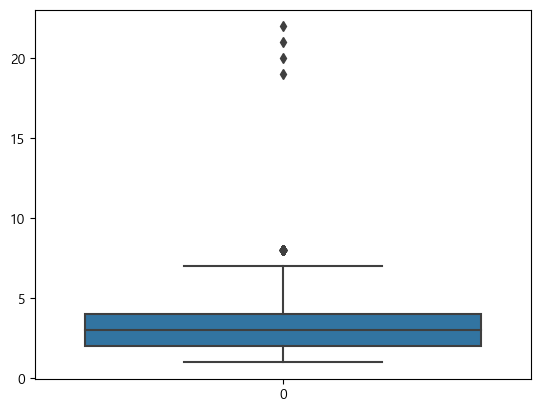

In [28]:
sns.boxplot(data=total_data['NumberOfTrips'])

In [29]:
# 이상치들 상한값, 하한값으로 대체
def outlier(df):
    IQR = df.quantile(0.75) - df.quantile(0.25)
    line_down = df.quantile(0.25) - IQR*1.5
    line_up = df.quantile(0.75) + IQR*1.5

    df = df.clip(line_down, line_up)

    return df

total_data['DurationOfPitch'] = outlier(total_data['DurationOfPitch'])
total_data['NumberOfTrips'] = outlier(total_data['NumberOfTrips'])

In [30]:
train = total_data[~total_data['ProdTaken'].isnull()]
test = total_data[total_data['ProdTaken'].isnull()]
test = test.drop('ProdTaken',axis=1)

In [31]:
train = train.drop(['index'],axis=1)
test = test.drop(['index'],axis=1)

# 결측치 처리

In [32]:
# 불필요한 id 칼럼 제거
train = train.drop(['id'],axis= 1)
test = test.drop(['id'],axis= 1)

In [33]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=3)
imputed= imputer.fit_transform(train)
train = pd.DataFrame(imputed, columns=train.columns)

In [34]:
imputer = KNNImputer(n_neighbors=3)

test_copy = test.copy()
train_drop = train.drop('ProdTaken', axis=1)
imputer.fit(train_drop)   # 여기서도 data leakage에 조심하자
test = imputer.transform(test)

test = pd.DataFrame(test, columns=test_copy.columns)

In [35]:
missing_col = check_missing_col(train)
missing_col = check_missing_col(test)

결측치가 존재하지 않습니다.
결측치가 존재하지 않습니다.


## Age 범주 변환

In [36]:
train['Age'].value_counts().sort_index()

18.00     5
19.00    16
20.00    13
21.00    17
22.00    20
         ..
57.00     9
58.00    11
59.00    14
60.00    12
61.00     3
Name: Age, Length: 75, dtype: int64

In [37]:
bins = list(range(15, 71, 10))
bins_label = [str(x)+"이상 "+str(x+10)+"미만" for x in bins]
train["Age_level"] = pd.cut(train["Age"], bins, right=False, labels=bins_label[:-1])

test["Age_level"] = pd.cut(test["Age"], bins, right=False, labels=bins_label[:-1])

In [38]:
train = train.drop(['Age'],axis= 1)
test = test.drop(['Age'],axis= 1)

In [39]:
train['Age_level'].value_counts().sort_index()

15이상 25미만    120
25이상 35미만    697
35이상 45미만    719
45이상 55미만    330
55이상 65미만     89
Name: Age_level, dtype: int64

In [40]:
test['Age_level'].value_counts().sort_index()

15이상 25미만     160
25이상 35미만    1078
35이상 45미만    1020
45이상 55미만     500
55이상 65미만     175
Name: Age_level, dtype: int64

## avg_level 인코딩

In [41]:
encoder = LabelEncoder() 
encoder.fit(train['Age_level'])
test['Age_level'] = encoder.transform(test['Age_level'])

## feature selectdion

In [43]:
# PermutationImportance 기반으로 중요도 낮다고 판단되는 칼럼 삭제
X = train.drop(['ProdTaken','NumberOfChildrenVisiting','MonthlyIncome','NumberOfPersonVisiting'],axis= 1)
y = train['ProdTaken']

test = test.drop(['NumberOfChildrenVisiting','MonthlyIncome','NumberOfPersonVisiting'],axis= 1)

X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.2, random_state=42)

In [44]:
print('학습 데이터 레이블 값 비율')
print(y_train.value_counts()/y_train.shape[0] * 100)
print('테스트 데이터 레이블 값 비율')
print(y_test.value_counts()/y_test.shape[0] * 100)

학습 데이터 레이블 값 비율
0.00   81.33
1.00   18.67
Name: ProdTaken, dtype: float64
테스트 데이터 레이블 값 비율
0.00   76.73
1.00   23.27
Name: ProdTaken, dtype: float64


In [45]:
# 레이블이 불균형한 데이터임을 확인할 수 있음
train['ProdTaken'].value_counts(normalize = True)

0.00   0.80
1.00   0.20
Name: ProdTaken, dtype: float64

# CatBoost

In [46]:
from sklearn.utils.class_weight import compute_class_weight

# 불균형한 클래스인 것으로 확인되어 class_weight = 'balanced'로 설정해준다. 
classes = np.unique(y_train)
weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train)
class_weights = dict(zip(classes, weights))

In [47]:
from catboost import CatBoostClassifier

In [48]:
from sklearn.model_selection import cross_val_score
cb = CatBoostClassifier(learning_rate= 0.03, max_depth= 10, n_estimators= 1000, 
                    class_weights= class_weights, subsample = 0.8, colsample_bylevel=1.0, random_state=42, verbose =0)

# 성능 지표는 정확도(accuracy) , 교차 검증 세트는 5개 
scores = cross_val_score(cb , X, y, scoring='accuracy',cv=5)

print('교차 검증별 정확도:',np.round(scores, 4))
print('평균 검증 정확도:', np.round(np.mean(scores),4))

교차 검증별 정확도: [0.9488 0.9105 0.9258 0.913  0.9386]
평균 검증 정확도: 0.9274


# PermutationImportance

In [50]:
import eli5
from eli5.sklearn import PermutationImportance

cb = CatBoostClassifier(learning_rate= 0.03, max_depth= 10, n_estimators= 1000, 
                    class_weights= class_weights, subsample = 0.8, colsample_bylevel=1.0, random_state=42, verbose =0).fit(X_train, y_train)
perm = PermutationImportance(cb, random_state= 42).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.0895 ± 0.0222,Passport
0.0430 ± 0.0127,ProductPitched
0.0399 ± 0.0147,DurationOfPitch
0.0399 ± 0.0083,PitchSatisfactionScore
0.0389 ± 0.0166,MaritalStatus
0.0379 ± 0.0169,PreferredPropertyStar
0.0373 ± 0.0124,CityTier
0.0363 ± 0.0123,Occupation
0.0332 ± 0.0125,TypeofContact
0.0220 ± 0.0173,NumberOfTrips


In [51]:
cb = CatBoostClassifier(learning_rate= 0.03, max_depth= 10, n_estimators= 1000, 
                    class_weights= class_weights, subsample = 0.8, colsample_bylevel=1.0, random_state=42, verbose =0)
 
cb.fit(X, y)

pred = cb.predict(test)

In [52]:
submission['ProdTaken'] = pred
# submission.to_csv('submission.csv', index=False)
submission

,id,ProdTaken
0,1,0.00
1,2,0.00
2,3,0.00
3,4,0.00
4,5,1.00
...,...,...
2928,2929,0.00
2929,2930,0.00
2930,2931,0.00
2931,2932,0.00
